# Exploring Recommendation System Suitability By User History Depth  
## Data Imports and Cleaning
Pippi de Bree

## Table of Contents
### [Introduction](#Introduction)

### [Library Imports](#Imports)
### [Audio File Selection and Type Transformation](#audioselect)
### [Vocal Isolated Dataset Creation](#vox)
    

### [Conclusion](#Conclusion)

# Introduction <a id=Introduction a>

Though not the focus of the current iteration of the project, this notebook starts the consideration of using vocal features within a content based recommendation system. As mentioned in `1_DatasetCreation.ipynb`, the data in this project was collected to allow for vocal data to be integrated. In order to access isolated vocal segments a few factors needed to be considered. Firstly the data, from the creator of the Lakh MIDI dataset is in the form of a `.mp3` files. Research showed that the most established library for working with audio data is [librosa](https://librosa.org/doc/latest/index.html), but this library is reliant on data being in `.wav` form. This transformation was made with the pydub library (more information below). Then, once this data is transformed we can begin isolating the vocals from the rest of the track. 

A full copy of the mp3 files would be very large, so for a demo of this process a small subsection (with only about 10 tracks) can be found in [this](https://drive.google.com/drive/folders/1CNT8dZqBX06oDlkubLOWZtPWJBdh6k4f) Google Drive folder.

These findings are fairly preliminary, but are included to reflect the beginnings of the next steps of the project.

# Library Imports <a id=Imports a>

We will need to import some specific functions and libraries to work with audio data.

In [2]:
import os
from pydub import AudioSegment
import librosa 
import librosa.display
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from __future__ import print_function

import timeit 

import capstone_utils


# Audio File Selection and Type Transformation <a id=audioselect a>

This notebook is to create the appropriate subset of the audio files, in the appropriate form. For this we will only use the tracks that are associated with our subset. The form of the audio data is `.mp3` files, and we will need to transform them to `.wav` files. For this reason we will use the `pydub` library to transform our files. The [github repo](https://github.com/jiaaro/pydub) for this library has an extensive API but we will only be using the AudioSegment class and it's `from_mp3()` and `export` methods. Using these will allow us to read in the data and then export it again as a `.wav` file. 

Because we want to save the files in a nested folder, for easier storage and memory usage, we will recreate the nested storage used for the `.mp3` files. We will use the same nested folder locations to store our wav files. As we already have access to nested alphabetised folders with single tracks in locations within them, we will reuse the section of the filepaths for the location within the nesting, but now within the sect_wavs folder. This is just for ease of writing the code, as we can keep aspects of the filepath and will not need to consider how to assign specific locations for the new files we will be creating. 

In [3]:
# Created the nested folder for our new .wav files (this must be done before calling the track_mp3_to_wav function)
!mkdir -p sect_wavs/{A..Z}/{A..Z}/{A..Z}

We need to import the names of the tracks that appear in our subset. For the full dataset we would use the `sect_tracks.csv` file created for this purpose. However, a small sample of 10 songs can be used to execute the 
mps to wav transformation. (These 

Within the `capstone_utils` package is a function, `track_mp3_to_wav`, that takes in the filepath to the directory in which the full mp3 files are stored and a set of track names. The function will look for the `.mp3` files that match the track names and then use the `pydub` library to transform these into `.wav` files, which are stored in the `sect_wavs` folder created above.

In [4]:
# Turning the track names array into a set for easier process tracking
sample_set = set(['TRAAAGR128F425B14B', 'TRAAAZF12903CCCF6B', 'TRAAGCZ128F93210FD', 'TRAAGKR12903CFC1E5', 
                  'TRAAGMC128F4292D0F', 'TRAAGMJ12903CAD7D4', 'TRAANTZ128E0792529', 'TRAANZE128F148BF55',
                  'TRAATZB12903CC59D8'])

# call to the track_mp3_to_wav function, using the sample
capstone_utils.track_mp3_to_wav('data/lmd_matched_mp3_sample', sample_set.copy())

data/lmd_matched_mp3_sample
Total number of tracks to find: 9
Number of tracks left to find: 8
Number of tracks left to find: 7
Number of tracks left to find: 6
Number of tracks left to find: 5
Number of tracks left to find: 4
Number of tracks left to find: 3
Number of tracks left to find: 2
Number of tracks left to find: 1
Number of tracks left to find: 0


At this point we would a small sample to work with, within the `sect_wavs` folder, and can begin our transformations to get the data to a working form. 

# Vocal Isolated Dataset Creation <a id=vox a>

The technique to be used for vocal separation comes from [this paper](https://users.cs.northwestern.edu/~zra446/doc/Rafii-Pardo%20-%20Music-Voice%20Separation%20using%20the%20Similarity%20Matrix%20-%20ISMIR%202012.pdf). The `voc_sep` function uses code from [here](https://librosa.org/librosa_gallery/auto_examples/plot_vocal_separation.html) to split the audio into a a foreground and background matrix (with the idea behind this separation coming from the reasonable assumption that harmony has less repeating patterns that instrumentation). This function is then used within the `voc_dict_maker` to create a dataframe with the isolated vocals for each track passed in (the vocals are directly separated from the wav file). Both of these functions can be found in the `capstone_utils` package. 

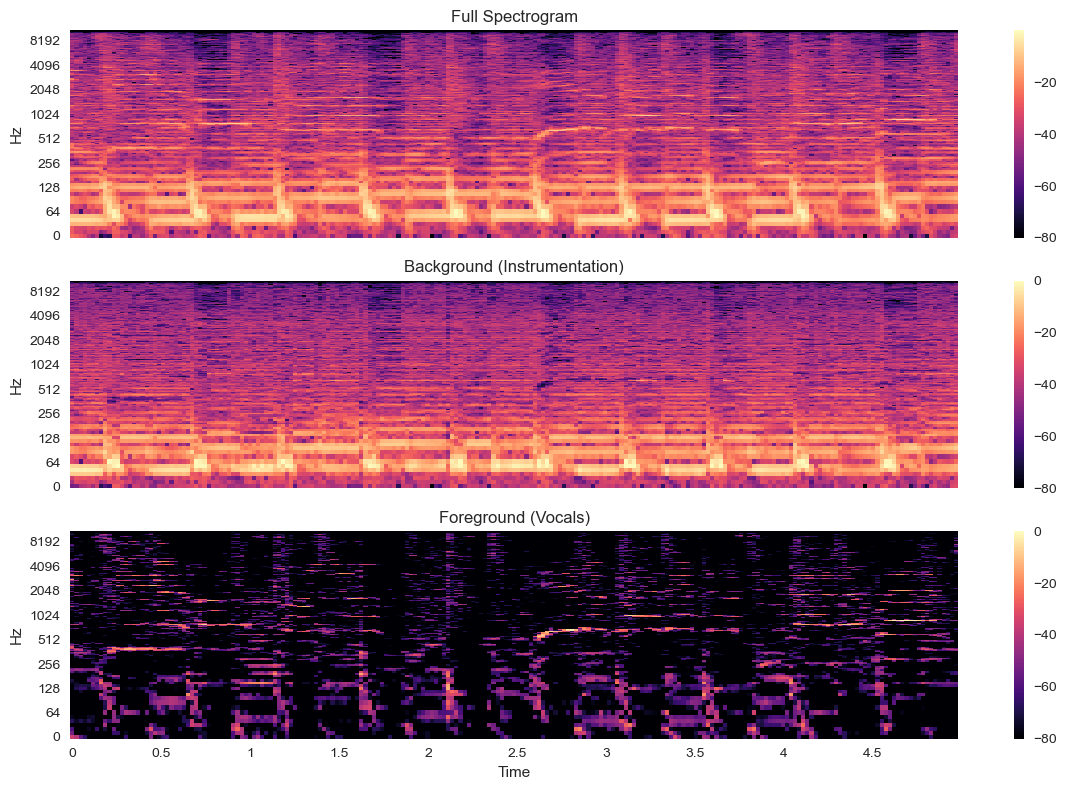

In [6]:
# example vocal separation
yay = capstone_utils.voc_sep('data/sect_wavs/A/A/A/TRAAAGR128F425B14B.wav', graph=True)

In [7]:
# example vocal isolation for set list of tracks
vocal_isol_tracks = capstone_utils.voc_dict_maker('data/sect_wavs', sample_set.copy())

Total number of tracks to find: 9
Number of tracks left to find: 8
Number of tracks left to find: 7
Number of tracks left to find: 6
Number of tracks left to find: 5
Number of tracks left to find: 4
Number of tracks left to find: 3
Number of tracks left to find: 2
Number of tracks left to find: 1
Number of tracks left to find: 0
Unfound Tracks: set()


In [8]:
# example dataframe of tracks matrices
vocal_isol_tracks

,track_name,foreground_matrix
0,TRAANZE128F148BF55,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAANTZ128E0792529,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAGMC128F4292D0F,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAGMJ12903CAD7D4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAGCZ128F93210FD,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAGKR12903CFC1E5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAATZB12903CC59D8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAAGR128F425B14B,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,TRAAAZF12903CCCF6B,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Conclusion <a id=Conclusion a>

As mentioned, this is a very early start to a potential development of this project.